Image Operations :

Mount Google Drive

Import libraries

cv.imread, cv2_imshow, waitKey()

Check image datatype, height, width, channels

Resizing / Scaling

Rotating

Histogram

Grayscale Transformation

Histogram Equalization

Getting input image from url

Cropping

Dilation & Erosion

Saving cropped image to Google Drive

1. Mount Google Drive

In [1]:
import io
import requests
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


2. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv # open source comp vision
from google.colab.patches import cv2_imshow # for image display
from skimage import io # input output, not used in this prac but will be used in the future
from PIL import Image 
import matplotlib.pylab as plt

3. cv.imread

waitKey()

1.waitKey(0) will display the window infinitely until any keypress (it is suitable for image display).

2.waitKey(1) will display a frame for 1 ms, after which display will be automatically closed.

if you use waitKey(0) you see a still image until you actually press something while for waitKey(1) the function will show a frame for at least 1 ms only.

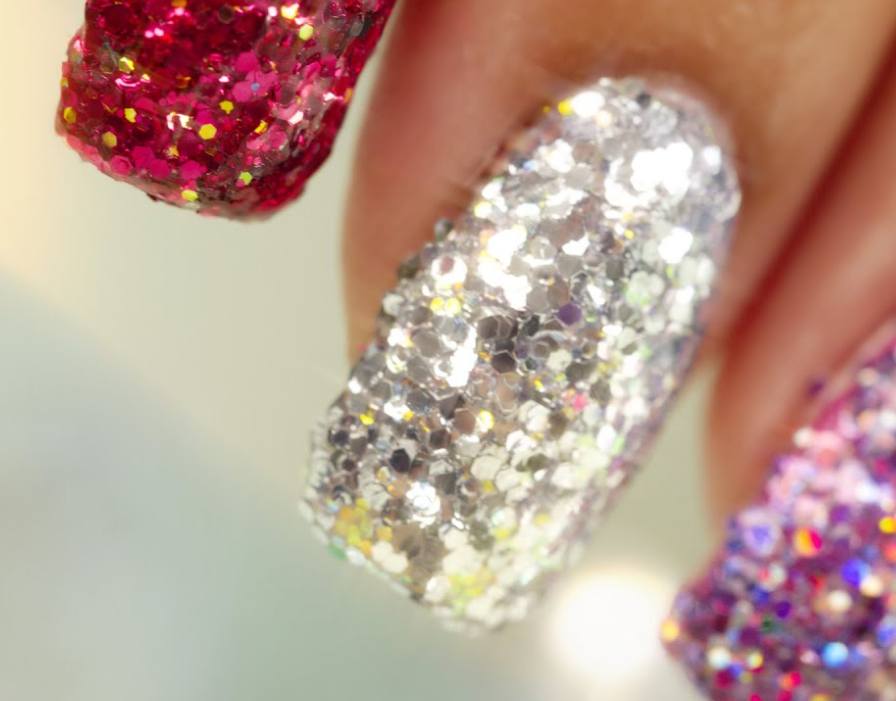

-1

In [5]:
DATA_DIR = "/content/gdrive/MyDrive/gold glitter.PNG" # mydrive is top level
image = cv.imread(DATA_DIR)
cv2_imshow(image)
cv.waitKey(0) # window will stay open. if 1, display for 1 sec

4. Check image datatype, height, & width

In [6]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)

# note that the image is in array

# index 0 indicates height/row (horizontal)
print(image.shape[0])
# index 1 indicates width/column (vertical)
print(image.shape[1])
# index 2 indicates shape / number of channels
print(image.shape[2]) # 3 means rgb

uint8
701
896
3


When executing this code, we see that (753, 794, 3) is outputted to our terminal. This means that the image has

* 701 rows,
* 896 columns, and
* 3 channels (the RGB components).


When we write matrices, it is common to write them in the form:

* (# of rows x # of columns) — which is the same way you specify the matrix size in NumPy.

However, when working with images this can become a bit confusing since we normally specify images in terms of width x height.

Looking at the shape of the matrix, we may think that our image is 701 pixels wide and 896 pixels tall. However, this would be incorrect. Our image is actually 896 pixels wide and 701 pixels tall, implying that the height is the first entry in the shape and the width is the second. This little may be a bit confusing if you’re just getting started with OpenCV and is important to keep in mind.

Since we know that our image is 896 pixels wide, let’s resize it and make it 500 pixels wide:

In [7]:
# print out the whole array of image
print(image.shape)

(701, 896, 3)


5. Resizing (Scaling)

Line 1-4:

We have to keep the aspect ratio of the image in mind, which is the proportional relationship of the width and the height of the image.

In this case, we are resizing the image to have a 500 pixel width, therefore, we need to calculate r, the ratio of the new width to the old width.

Then, we construct the new dimensions of the image by using 500 pixels for the width, and r * the old image height. Doing this allows us to maintain the aspect ratio of the image.

Line 6-9:

The actual resizing of the image happens here. The first parameter is the original image that we want to resize and the second argument is the our calculated dimensions of the new image. The third parameter tells us the algorithm to use when resizing. Finally, we show the image and wait for a key to be pressed.

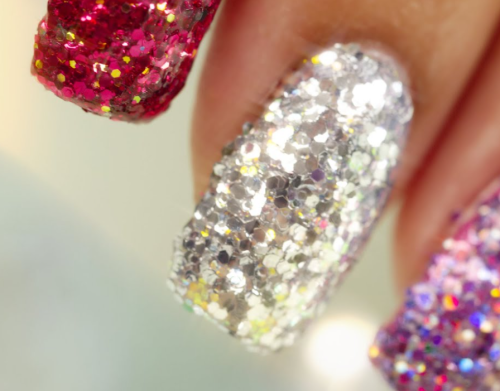

-1

In [8]:
# to prevent image from being skewed or distorted 
# calculate the ratio of the new image to the old image. keep same aspect ratio
r = 500 / image.shape[1] # index 1 indicates width. get aspect ratio
dim = (500, int(image.shape[0] * r)) # construct new dimension

# perform the actual resizing of the image
resized = cv.resize(image, dim, interpolation = cv.INTER_AREA)
cv2_imshow(resized)
cv.waitKey(0) # image stay visible

6. Rotating Image

Line 2: For convenience, we grab the width and height of the image and store them in their respective variables.

Line 3: Calculate the center of the image — we simply divide the width and height by 2.

Line 6: Compute a matrix that can be used for rotating (and scaling) the image.

M = cv.getRotationMatrix2D(center, 180, 1.0)

1. The first argument is the center of the image that we computed. If you wanted to rotate the image around any arbitrary point, this is where you would supply that point.

2. The second argument is our rotation angle (in degrees).

3. The third argument is our scaling factor — in this case, 1.0, because we want to maintain the original scale of the image. If we wanted to halve the size of the image, we would use 0.5. Similarly, if we wanted to double the size of the image, we would use 2.0.

Line 7: Perform the actual rotation, by supplying the image, the rotation matrix, and the output dimensions.

Lines 8-9: Show the rotated image.

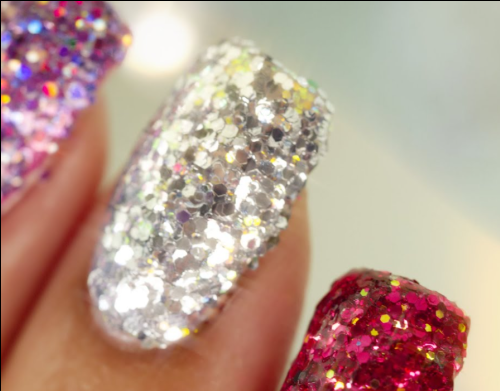

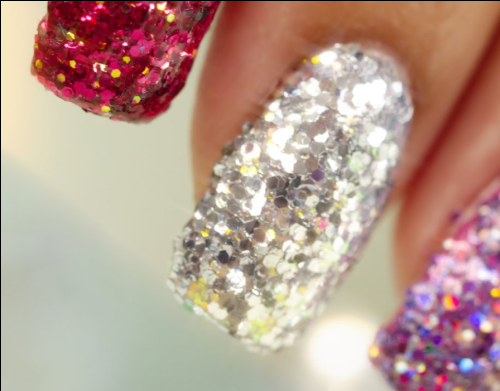

-1

In [9]:
# prepare to rotate
(h, w) = resized.shape[:2] # from initial to 2, get dimension (height and width)
center = (w / 2, h / 2) # find centre, since usually rotate around the centre

# matrix to rotate at centre by 180 degrees with 1.0 scaling factor (stay the same size)
M = cv.getRotationMatrix2D(center, 180, 1.0) 
rotated = cv.warpAffine(resized, M, (w, h)) # perform actual rotation
cv2_imshow(rotated)

# re-rotate back
M = cv.getRotationMatrix2D(center, 180, 1.0)
rotated = cv.warpAffine(rotated, M, (w, h))
cv2_imshow(rotated)
cv.waitKey(0)

7. Histogram

* Generate Histogram of color image and grayscale image
Histograms plots how many times (frequency) each intensity value in image occurs
* In grayscale, each pixel is shade of gray 0 (black) to 255 (white)
* Histograms: only statistical information
* No indication of location of pixels

Sometimes you want to enhance the contrast in your image or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the matplot.pylab hist() function.

More info: Histogram

Display the histogram of all the pixels in the color image

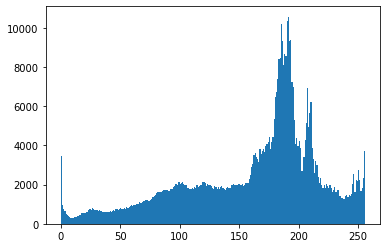

In [10]:
# 0 is pitch black (same as 1 for binary images)
# 256 is pure white (similar to 1 for binary images)

# display frequencies of 256 different shades
# smaller values on x axis indicates higher intensities of grey
plt.hist(rotated.ravel(), bins = 256, range = [0,256])
plt.show()

# y axis counts freq. show statistics information of number of darker and lighter pixels
# histogram distribution show overall image properties - contrast, intensities, etc

Display the histogram of R, G, B channel

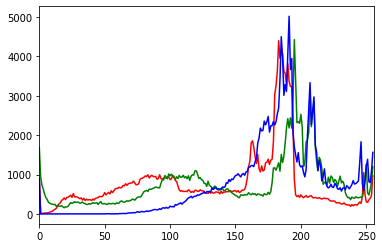

In [11]:
color = ('r','g','b')
for i, col in enumerate(color):
    histr = cv.calcHist([rotated], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256]) # x axis limit
plt.show()

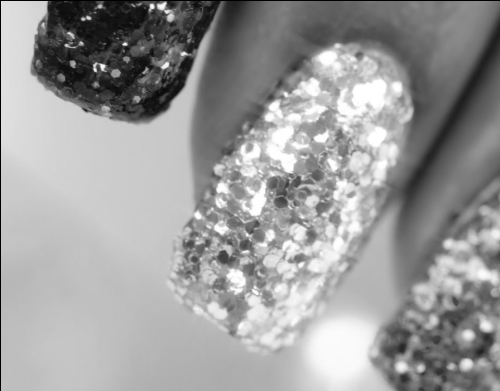

In [12]:
# convert image to grey scale
gray_image = cv.cvtColor(rotated, cv.COLOR_RGB2GRAY)
cv2_imshow(gray_image)

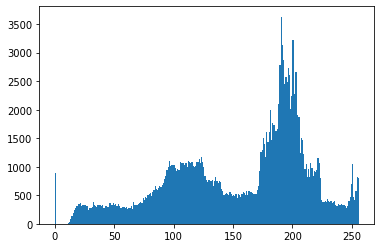

In [13]:
# Plot the histogram of the gray image
# the observed frequency of the image hist has decreased ~ 60% of the histogram of color image
plt.hist(gray_image.ravel(), bins = 256, range = [0, 256])
plt.show()

8. Grayscale Transformation

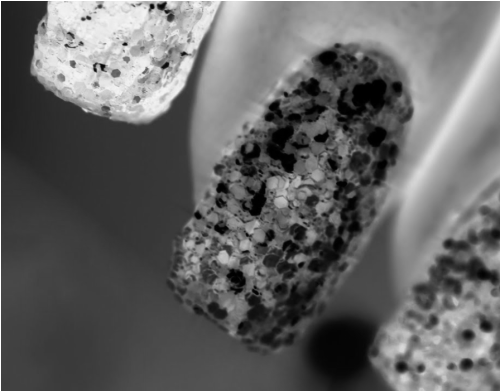

In [14]:
# inverse operation of the grayscale image, where bright pixels become dark, and vice versa
im2 = 255 - gray_image # ori matrix is of 0 to 256
cv2_imshow(im2)

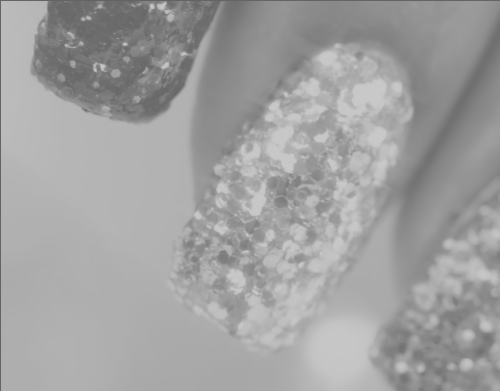

In [15]:
# after adding a constant, all the pixels become brighter with a hazing-like effect
# bigger constant generates stronger haze effect
im3 = (100/255)*gray_image + 100
cv2_imshow(im3)

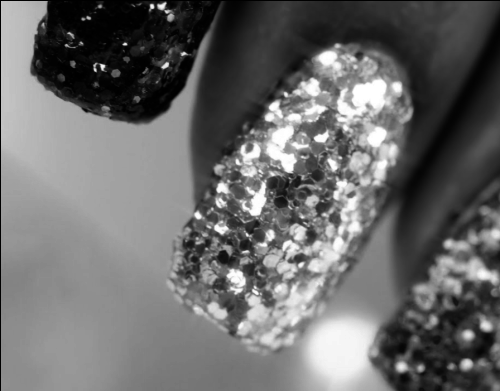

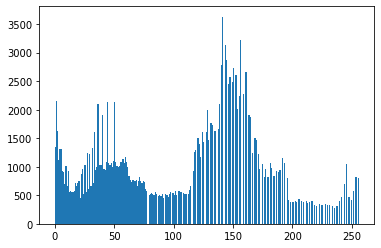

In [16]:
# decrease lightness level of the gray_image
im4 = 255*(gray_image/255)**2 # ** = to the power of
cv2_imshow(im4)
plt.hist(im4.ravel(), bins = 256, range = [0, 256])
plt.show()

9. Histogram Equalization

On a dark image, this transformation will flatten the gray-level histogram so that all intensities are as equally common as possible. The transform function is a cumulative distribution function (cdf) of the pixel values in the image (normalized to map the range of pixel values to the desired range). This example uses image 4 (im4).

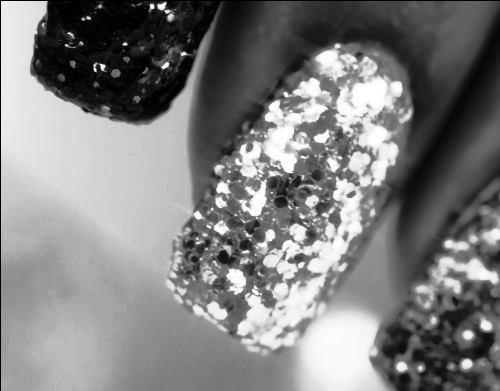

In [17]:
# improve image
# spread out intensity to be as equal as possible

# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """

  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max() # normalize to max level
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on dark image to increase the contrast
im5 = histeq(im4) # name the improved image as im5
cv2_imshow(im5)
# observe in output that the contrast of the black background has increased. able to see detailing.

1. Dark image 👉 gray levels would be clustered at the lower end

2. Uniformly bright image 👉 gray levels would would be clustered at the upper end.

3. Well contrasted image 👉 gray levels would be well spread out

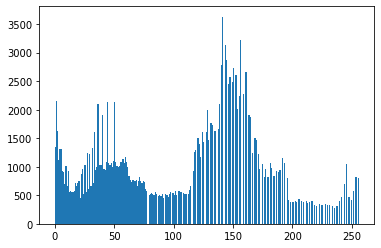

In [18]:
# visualize the histogram of the image after histogram equalization

# Before histogram equalization
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()
# more frequency of darker pixels

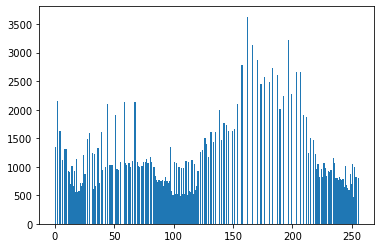

In [19]:
# After histogram equalization that spreads out grey level
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()
# well contrasted image

10. Getting input image from url

11. Cropping
Consider

* (0,0) as top left corner, with left-to-right as x direction
* top-to-bottom as y direction.

then we have:

* (x1,y1) as the top-left vertex
* (x2,y2) as the bottom-right vertex of a rectangle region

then:

roi = im[y1:y2, x1:x2]

12. Dilation & Erosion

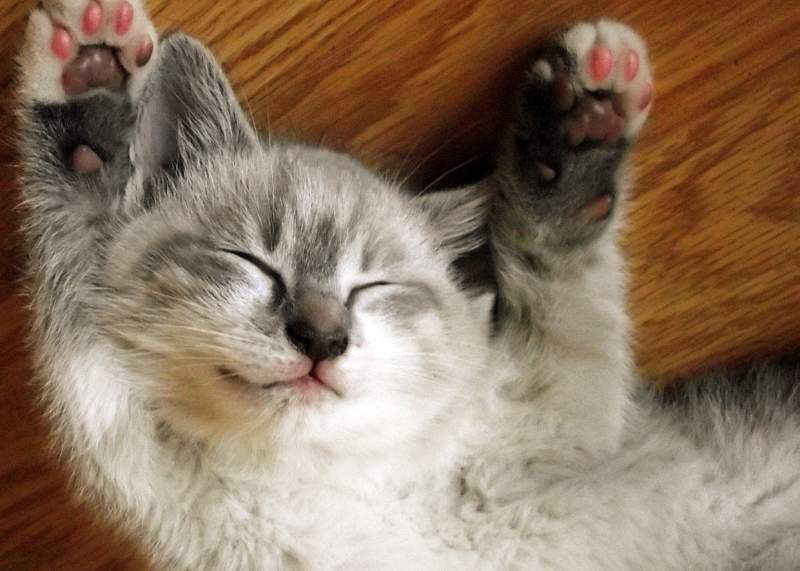

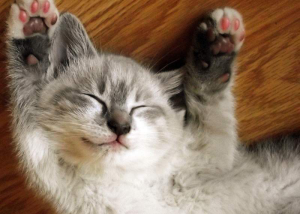

(214, 300, 3)


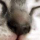

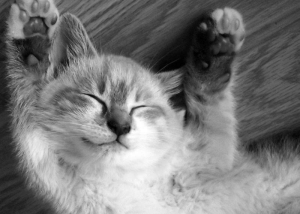

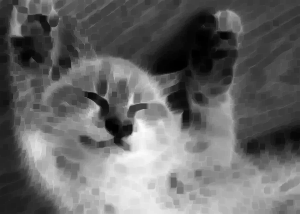

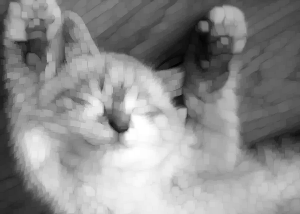

-1

In [20]:
# Python program to demonstrate erosion & dilation of images.

# libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
  
# Reading the input image from url
img = io.imread("https://placekitten.com/800/571") 

# for resizing to prevent image does from skewed or distorted 
# calculate the ratio of the new image to the old image
r = 300 / img.shape[1]
dim = (300, int(img.shape[0] * r))

# Warning: Color image loads in BGR mode by OpenCV, but Matplotlib displays in RGB mode. 
# So color images will not be displayed correctly in Matplotlib if image is read with OpenCV.
# to correct the tone that has obvious blue hues :
bgr2rgb = cv2.cvtColor(img, cv.COLOR_BGR2RGB)
cv2_imshow(bgr2rgb)

# perform the actual resizing of the image and show it
# inter_area means centre area
resized3 = cv.resize(bgr2rgb, dim, interpolation = cv.INTER_AREA)
cv2_imshow(resized3)
cv.waitKey(0) # show resized image

# show height and width of resized image
print(resized3.shape)

# crop the image using array slices 
cropped = resized3[100:140, 100:140] # rough eyeballing for height and width
cv2_imshow(cropped)
cv.waitKey(0) # show cropped image

# convert to grey scale
gray_image3 = cv.cvtColor(resized3, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image3)

# using numpy, taking a matrix of size 5 as the kernel
kernel = np.ones((5,5), np.uint8)
  
# first parameter is the original image
# kernel is the matrix with which image is convolved
# third parameter is the number of iterations (the extent of erode/dilate for the given image)
img_erosion2 = cv2.erode(gray_image3, kernel, iterations=1)
img_dilation2 = cv2.dilate(gray_image3, kernel, iterations=1)
# note that these 2 lines will not produce the same results as in Opening and Closing

cv2_imshow(img_erosion2)
cv2_imshow(img_dilation2)
  
cv2.waitKey(0)

13. Saving cropped image to Google Drive

In [21]:
cv2.imwrite("/content/gdrive/MyDrive/CVNLP Colab Notebooks/5May2020-cropped_cat.png", cropped)
# true means successful

True